# A Função Sigmoide na Regressão Logística


Ao aprender sobre regressão logística, fiquei confuso a respeito de por que uma função sigmóide era usada para mapear as entradas até a saída prevista. Quero dizer, claro, é uma função legal que mapeia de forma limpa de qualquer número real para um intervalo de $ -1 $ a $ 1 $, mas de onde ele veio? Este caderno espera explicar.

## Regressão Logistica

Com a classificação, temos uma amostra com alguns atributos (recursos a.k.a) e, com base nesses atributos, queremos saber se ela pertence ou não a uma classe binária. A probabilidade de que a saída seja 1 dada sua entrada poderia ser representada como:

$$P(y=1 \mid x)$$

Se as amostras de dados tiverem recursos de $ n $, e acharmos que podemos representar essa probabilidade por meio de alguma combinação linear, podemos representar isso como:

$$P(y=1 \mid x) = w_o + w_1x_1 + w_2x_2 + ... + w_nx_n$$

O algoritmo de regressão poderia ajustar esses pesos aos dados que ele vê, entretanto, pareceria difícil mapear uma combinação linear arbitrária de entradas, cada uma variando de $ - \infty $ a $ \infty $ a um valor de probabilidade no intervalo de US $ 0 a US $ 1.

### O  "Odds Ratio"

O odds ratio é um conceito relacionado à probabilidade que pode nos ajudar. É igual à probabilidade de sucesso dividida pela probabilidade de falha, e pode ser familiar para você se você olhar para linhas de apostas em disputas esportivas:

$$odds(p) = \frac{p}{1-p}$$

Dizendo, "as chances de a saída ser dada uma entrada" ainda parecem capturar o que estamos procurando. No entanto, se traçarmos a função de chances de 0 a 1, ainda há um problema:


<img src='https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/bonus/images/logistic_regression_schematic.png'>

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd  
import statsmodels.api as sm  
import numpy as np
import bokeh
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, push_notebook, show
from ipywidgets import interact
import scipy.special
import statsmodels.formula.api as smf
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

output_notebook()

Loading BokehJS ...

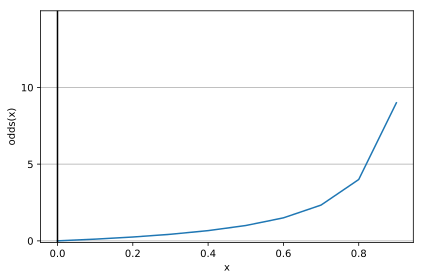

In [5]:
import math

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def odds(p):
    return p/(1 - p)

x = np.arange(0, 1, 0.1)
odds_x = odds(x)

plt.plot(x, odds_x)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 15)
plt.xlabel('x')
plt.ylabel('odds(x)')

# y axis ticks and gridline
plt.yticks([0.0, 5, 10])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()

### Log Odds

Uma combinação linear arbitrária dos recursos de entrada ainda pode ser menor que zero. No entanto, se pegarmos o log do odds ratio, agora temos algo que varia de $ - \infty $ a $\infty$


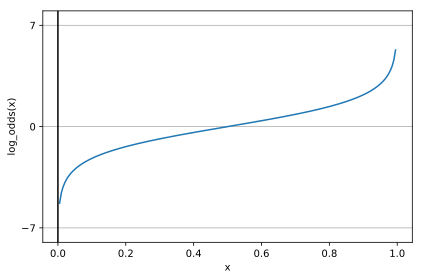

In [6]:
def log_odds(p):
    return np.log(p / (1 - p))

x = np.arange(0.005, 1, 0.005)
log_odds_x = log_odds(x)

plt.plot(x, log_odds_x)
plt.axvline(0.0, color='k')
plt.ylim(-8, 8)
plt.xlabel('x')
plt.ylabel('log_odds(x)')

# y axis ticks and gridline
plt.yticks([-7, 0, 7])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

Ter uma combinação linear de arbitrária apresenta mapa para o `função log_odds` permite quaisquer possíveis valores de entrada para cada $ x_i $ e ainda representa conceitualmente o que estamos tentando representar: a de que uma combinação linear de entradas está relacionada com a liklihood que uma amostra pertence a uma determinada classe. Nota: o log da função odds é freqüentemente chamado de função "logistic". Então agora nós temos:


$$\text{log_odds}(P(y=1 \mid x)) = w_o + w_1x_1 + w_2x_2 + ... + w_nx_n$$

Se nós ainda quisermos obter o $ P (y = 1 \mid x) $, podemos tomar o inverso da função `log_odds`.


## A Sigmóide

Vamos encontrar o inverso da função `log_odds`: Começando com:

$y = log(\frac{x}{1-x})$

e trocando $ y $ e $ x $ e resolvendo por $ y $


<br>$x = log(\frac{y}{1-y})$


<br>$e^x = \frac{y}{1-y}$
<br>$y = (1-y)*e^x$
<br>$y = e^x - y*e^x$
<br>$y + ye^x = e^x$
<br>$y*(1 + e^x) = e^x$
<br>$y = \frac{e^x}{1+e^x}$
<br>$y = \frac{1}{\frac{1}{e^x} + 1}$
<br>$y = \frac{1}{1 + e^{-x}}$

Vamos usar o $ \phi $ para representar essa função e plotar isso para ter uma ideia do que parece:

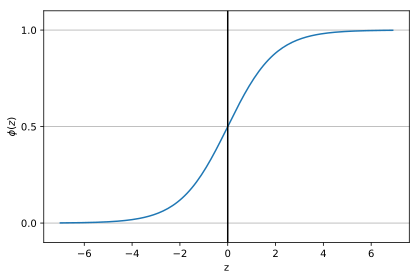

In [7]:
def inverse_log_odds(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = inverse_log_odds(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

A forma inversa da função logística é parecida com um S, que, eu li, é por isso que é chamada de função Sigmoide. Então voltando ao nosso:

$$\text{log_odds}(P(y=1 \mid x)) = w_o + w_1x_1 + w_2x_2 + ... + w_nx_n$$

Se chamarmos de $ w_o + w_1x_1 + w_2x_2 + ... + w_nx_n = w ^ Tx $ simplesmente $ z (x) $:

$$ \text{log_odds}(P(y=1 \mid x)) = z(x) $$

E tomando o inverso:

$$ P(y=1 \mid x) = \phi(z) = \dfrac{1}{1 + e^{-z}} $$

e lá está: Regressão Logística ajusta-se a pesos de modo que uma combinação linear de suas entradas mapeie as probabilidades de log, sendo a saída igual a 1.

# Vamos a mais um exemplo


## Vamos usar um dataset da UCI

<br>
<img src="img/uci.png" / width='400' >
<br>

Bem-vindo ao Repositório de Aprendizado de Máquina da UC Irvine!

Atualmente, mantemos 468 conjuntos de dados como um serviço para a comunidade de aprendizado de máquina. Você pode ver todos os conjuntos de dados através da nossa interface pesquisável. Para uma visão geral do Repositório, por favor visite nossa página Sobre. Para obter informações sobre como citar conjuntos de dados em publicações, leia nossa política de citações. Se você deseja doar um conjunto de dados, consulte nossa política de doações. Para quaisquer outras perguntas, sinta-se à vontade para entrar em contato com os bibliotecários do Repositório.


# Banco Português

O conjunto de dados provém do repositório UCI repository ( http://archive.ics.uci.edu/ml/index.php ) e está relacionado com campanhas de marketing direto (chamadas telefónicas) de uma instituição bancária portuguesa. O objetivo da classificação é prever se o cliente irá assinar (1/0) para um depósito a prazo (variável y).


Com as seguintes variáveis:

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


- *y* — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

## Lendo e verificando os dados

In [18]:
df = pd.read_csv('../../99 Datasets/marketing.csv.zip')

In [9]:
df.shape

(41188, 21)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

df = df.astype({
    "age":"int64",
    "duration":"int64",
    "campaign":"int64",
    "pdays":"int64",
    "previous":"int64",
    "emp_var_rate":"float64",
    "cons_price_idx":"float64",
    "cons_conf_idx":"float64",
    "euribor3m":"float64",
    "nr_employed":"float64",
    "y":"int64"})
df.info()

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## Investigando a correlação

In [22]:
df.corr().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
emp_var_rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cons_price_idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cons_conf_idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nr_employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


In [23]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [24]:
df['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [25]:
# Analisando a correlação de todas as variáveis em relação ao Y: se o cliente comprou ou não o produto de Renda Fixa 

df.corr().round(2)['y'].sort_values()

nr_employed      -0.35
pdays            -0.32
euribor3m        -0.31
emp_var_rate     -0.30
cons_price_idx   -0.14
campaign         -0.07
age               0.03
cons_conf_idx     0.05
previous          0.23
duration          0.41
y                 1.00
Name: y, dtype: float64

## Analisando probabilidade condicional com pandas

<br>
<img src="img/prob_condicional.png" / width='300' >
<br>

Na teoria da probabilidade, a probabilidade condicional é uma medida da probabilidade de um evento (ocorrendo alguma situação particular), dado que outro evento ocorreu.  Se o evento de interesse é A e o evento B é conhecido ou assumido como tendo ocorrido, "a probabilidade condicional de A dado B", ou "a probabilidade de A sob a condição B", é geralmente escrita como $ P (A | B ) $, ou às vezes $ PB (A) $ ou $ P (A / B) $. Por exemplo, a probabilidade de que qualquer pessoa tenha uma tosse em um determinado dia pode ser de apenas 5%. Mas se nós sabemos ou assumimos que a pessoa tem um resfriado, então eles são muito mais propensos a tossir. A probabilidade condicional de tossir pela indisposição pode ser de 75%, então: $P (Tosse)$ = 5% ; $P (Tosse | Doente)$ = 75% 

O conceito de probabilidade condicional é um dos mais fundamentais e um dos mais importantes na teoria da probabilidade. Mas as probabilidades condicionais podem ser bastante escorregadias e requerem interpretação cuidadosa. Por exemplo, não precisa haver uma relação causal entre A e B, e eles não precisam ocorrer simultaneamente.

Neste sentido é importante pensar que, quando discutimos a correlação entre as variáveis, estamos calculando uma variação linear de uma variável com a outra, o que significa que não captamos variações não lineares entre estas duas variáveis. 

Por isso, podemos pensar que a probabilidade condicional entre as variávies nos dá a idéia de interdependência entre ambas, a qual não pode ser captada pela correlação devido a falta de linearidade entre elas.

### Aplicação da probabilidade condicional para variáveis categóricas

- Variáveis categóricas

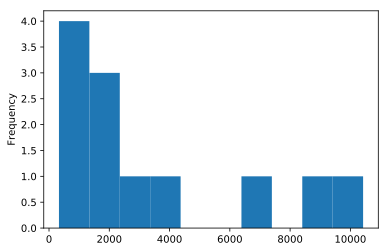

In [26]:
df['job'].value_counts().plot.hist()

In [27]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [28]:
# Mudando o tipo de variável para Job

df['job'] = df['job'].astype('category')

In [ ]:
df.dtypes

In [29]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [30]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [31]:
df.job.unique()

[blue-collar, technician, management, services, retired, ..., unemployed, entrepreneur, self-employed, unknown, student]
Length: 12
Categories (12, object): [blue-collar, technician, management, services, ..., entrepreneur, self-employed, unknown, student]

## Utilizando groupby, pivot e crosstab

    df.groupby(['']).agg({})

    pd.pivot_table(df, values='', columns='')

    pd.crosstab(index, columns, values, aggfunc)

## Groupby

Uma operação groupby envolve alguma combinação de divisão do objeto, aplicação de uma função e combinação dos resultados. Isso pode ser usado para agrupar grandes quantidades de dados e operações de computação nesses grupos.

In [33]:
# Média de adesão ao produto bancário por estado civil

print("Mean y by marital status")
print(df.groupby(['marital'])[['y']].mean())
print("Stantard Dev by marital status")
print(df.groupby(['marital'])[['y']].std())

Mean y by marital status
                 y
marital           
divorced  0.103209
married   0.101573
single    0.140041
unknown   0.150000
Stantard Dev by marital status
                 y
marital           
divorced  0.304265
married   0.302091
single    0.347045
unknown   0.359324


In [34]:
# Contagem do número de adesões ao produto bancário por estado civil

df.groupby(['marital'])[['y']].count()


,y
marital,
divorced,4612
married,24928
single,11568
unknown,80


In [37]:
# Média de adesão do produto bancário em tipo de emprego por estado civil 

df.groupby(['marital', 'job'])[['y']].mean().tail(20)

y
marital job                    
single  management     0.125749
        retired        0.129032
        self-employed  0.134565
        services       0.109059
        student        0.320388
        technician     0.121994
        unemployed     0.191235
        unknown        0.202703
unknown admin.         0.142857
        blue-collar    0.214286
        entrepreneur   0.333333
        housemaid      0.000000
        management     0.000000
        retired        0.200000
        self-employed  0.000000
        services       0.000000
        student        0.000000
        technician     0.166667
        unemployed     0.000000
        unknown        0.333333

In [38]:
# DataFrame da contagem de adesões ao produto bancário em tipo de emprego por estado civil

temp = pd.pivot_table(df, values='y', 
                    index='job', 
                    columns='marital',
                    aggfunc='count')

In [39]:
temp['sum'] = temp.sum(axis=1)

In [40]:
temp

marital,divorced,married,single,unknown,sum
job,,,,,
admin.,1280,5253,3875,14,10422
blue-collar,728,6687,1825,14,9254
entrepreneur,179,1071,203,3,1456
housemaid,161,777,119,3,1060
management,331,2089,501,3,2924
retired,348,1274,93,5,1720
self-employed,133,904,379,5,1421
services,532,2294,1137,6,3969
student,9,41,824,1,875


## Crosstab

Calcula uma tabulação cruzada simples de dois (ou mais) fatores. Por padrão, calcula uma tabela de frequência dos fatores, a menos que uma matriz de valores e uma função de agregação sejam passadas.

In [41]:
df.shape

(41188, 21)

In [42]:
df.drop_duplicates().shape

(41176, 21)

In [43]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [44]:
# Média, contagens únicas e desvio-padrão de adesão ao produto bancário do estado civil por tipo de emprego

pd.crosstab(index=df['job'],
            columns=df['marital'],
            values=df['y'],
            aggfunc=['mean', 'nunique', 'std'])

mean                                nunique                 \
marital        divorced   married    single   unknown divorced married single   
job                                                                             
admin.         0.103125  0.124120  0.146065  0.142857        2       2      2   
blue-collar    0.072802  0.062958  0.088219  0.214286        2       2      2   
entrepreneur   0.078212  0.082166  0.103448  0.333333        2       2      2   
housemaid      0.099379  0.095238  0.134454  0.000000        2       2      2   
management     0.117825  0.108186  0.125749  0.000000        2       2      2   
retired        0.264368  0.258242  0.129032  0.200000        2       2      2   
self-employed  0.120301  0.090708  0.134565  0.000000        2       2      2   
services       0.062030  0.072363  0.109059  0.000000        2       2      2   
student        0.333333  0.195122  0.320388  0.000000        2       2      2   
technician     0.083979  0.104632  0.121994  0.166667        2       2      2   
unemployed     0.080645  0.135647  0.191235  0.000000        2       2      2   
unknown        0.230769  0.068376  0.202703  0.333333        2       2      2   

                            std                                
marital       unknown  divorced   married    single   unknown  
job                                                            
admin.              2  0.304241  0.329749  0.353216  0.363137  
blue-collar         2  0.259990  0.242906  0.283691  0.425815  
entrepreneur        2  0.269259  0.274746  0.305296  0.577350  
housemaid           1  0.300104  0.293733  0.342582  0.000000  
management          1  0.322889  0.310689  0.331897  0.000000  
retired             2  0.441631  0.437839  0.337053  0.447214  
self-employed       1  0.326543  0.287352  0.341709  0.000000  
services            1  0.241437  0.259144  0.311850  0.000000  
student             1  0.500000  0.401218  0.466909       NaN  
technician          2  0.277536  0.306121  0.327350  0.389249  
unemployed          1  0.273394  0.342683  0.394059  0.000000  
unknown             2  0.438529  0.252931  0.404757  0.500000

## Utilizando qcut

Função de discretização baseada em quantis. Transforma em discreta a variável em intervalos de tamanho igual com base na classificação ou com base em quantis de amostra. Por exemplo, 1000 valores para 10 quantis produziriam um objeto Categórico indicando associação de quantil para cada ponto de dados.

In [45]:
df['grouped_duration'] = pd.qcut(x=df['duration'], q=5, labels=[1,2,3,4,5])

In [46]:
# Separação da variável idade em tercil (q=3)

pd.qcut(x=df['age'], q=3, labels=["estudante",
                                  "trabalhador",
                                  "aposentado"]).value_counts(3)

estudante      0.358211
trabalhador    0.327765
aposentado     0.314024
Name: age, dtype: float64

In [47]:
# Criando uma Dummy

df['grouped_age'] = pd.qcut(x=df['age'], q=3, labels=[1,2,3])
df['grouped_age'].value_counts()

1    14754
2    13500
3    12934
Name: grouped_age, dtype: int64

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Variável duration

A duração de uma chamada para um cliente somente é conhecida após seu término, eventualmente no memsmo momento da adesão do cliente ao produto bancário, e por isso não é conhecida até que o cliente execute a adesão, ou seja, assuma valor verdadeiro (1) para Y. isso se caracteria como LEAKAGE, ou um dados que não pode ser utilizado para predição (Conforme descrito pelo próprio dicionário de dados acima).

### O que é vazamento de dados no Machine Learning?

O vazamento de dados pode fazer com que você crie modelos preditivos excessivamente otimistas, se não completamente inválidos.

O vazamento de dados é quando as informações de fora do conjunto de dados de treinamento são usadas para criar o modelo. Essa informação adicional pode permitir que o modelo aprenda ou saiba algo que de outra forma não conheceria e, por sua vez, invalidaria o desempenho estimado do modo que está sendo construído.

"Se algum outro recurso cujo valor não estivesse realmente disponível na prática no momento em que você deseja usar o modelo para fazer uma previsão, é um recurso que pode introduzir vazamento em seu modelo." _Data Skeptic_

"Quando os dados que você está usando para treinar um algoritmo de aprendizado de máquina têm as informações que você está tentando prever." _Daniel Gutierrez_

Há um tópico em segurança de computador chamado vazamento de dados e prevenção de perda de dados que está relacionado, mas não o que estamos falando.

#### Vazamento de dados é um problema sério por pelo menos 3 razões:


- É um problema se você estiver executando uma competição de aprendizado de máquina. Os modelos top usarão os dados com vazamento em vez de serem bons modelos gerais do problema subjacente.

- É um problema quando você é uma empresa que fornece seus dados. Reverter um anonimato e ofuscação pode resultar em uma violação de privacidade que você não esperava.

- É um problema quando você está desenvolvendo seus próprios modelos preditivos. Você pode estar criando modelos excessivamente otimistas que são praticamente inúteis e não podem ser usados ​​na produção.


Como praticantes de aprendizado de máquina, estamos principalmente preocupados com este último caso.


#### Eu tenho vazamento de dados?

Uma maneira fácil de saber que você tem vazamento de dados é se estiver obtendo um desempenho que parece bom demais para ser verdade.

Como você pode prever números de loteria ou escolher ações com alta precisão.

"Bom demais para ser verdade" desempenho é "uma oferta inoperante" de sua existência

O vazamento de dados geralmente é mais um problema com conjuntos de dados complexos, por exemplo:


- Conjuntos de dados de séries temporais ao criar conjuntos de treinamento e teste podem ser difíceis.
- Gráfico de problemas em que métodos de amostragem aleatória podem ser difíceis de construir.
- Observações analógicas como som e imagens em que as amostras são armazenadas em arquivos separados que possuem um tamanho e um registro de data e hora.

### Prosseguindo com a análise

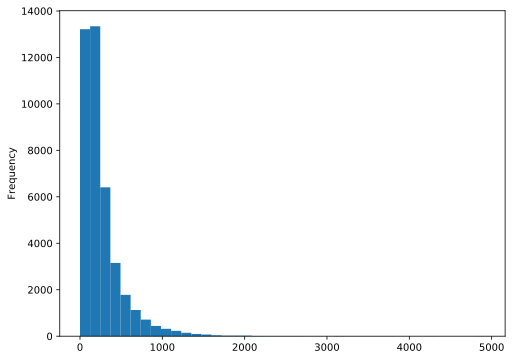

In [50]:
# Visualizando a distribuição da variável duration

df.duration.plot.hist(bins=40, figsize=(8,6))

In [51]:
# Separando o duration em quantil (q=5) e criando uma Dummy

df['grouped_duration'] = pd.qcut(x=df['duration'], q=5, labels=[1,2,3,4,5])

In [52]:
df.groupby(['grouped_duration'])[['y']].mean()

,y
grouped_duration,
1,0.005246
2,0.032436
3,0.072758
4,0.124556
5,0.329968


In [53]:
pd.crosstab(index=df['marital'], 
            columns=df['grouped_duration'],
            values=df['y'],
            aggfunc='mean')

grouped_duration,1,2,3,4,5
marital,,,,,
divorced,0.004158,0.033822,0.070686,0.098343,0.318080
married,0.004933,0.025672,0.060155,0.108853,0.313086
single,0.006402,0.046582,0.101064,0.169521,0.369102
unknown,0.000000,0.000000,0.157895,0.076923,0.320000


# Quando usamos OLS para estimar esse efeito, temos um modelo linear de probabilidade


- pode ser usado porque a categórica tem distribuição de Bernouli e sua média é a própria probabilidade
- Pode ser maior que 1 e menor que zero (que não faz muito sentido)

In [54]:
# 	cons_conf_idx	euribor3m	nr_employed

In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'grouped_duration',
       'grouped_age'],
      dtype='object')

### Rodando uma primeira regressão linear para comparação

In [56]:
function = ''' y ~ age + duration + campaign + pdays + previous + emp_var_rate + cons_price_idx'''

In [57]:
model1 = smf.ols(function, df).fit()
print(model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.312    
Dependent Variable: y                AIC:                6665.9069
Date:               2019-05-22 11:31 BIC:                6734.9141
No. Observations:   41188            Log-Likelihood:     -3325.0  
Df Model:           7                F-statistic:        2664.    
Df Residuals:       41180            Prob (F-statistic): 0.00     
R-squared:          0.312            Scale:              0.068822 
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -6.9688   0.3426 -20.3423 0.0000 -7.6403 -6.2974
age                0.0007   0.0001   5.6154 0.0000  0.0005  0.0009
duration           0.0005   0.0000  93.5635 0.0000  0.0005  0.0005
campaign           0.0006   0.0005   1.2622 0.2069 -0.0003  0.0015
pdays        

## Rodando uma Logit com a mesma função

In [58]:
logit = smf.logit(function, df).fit()
print(logit.summary2())

Optimization terminated successfully.
         Current function value: 0.222327
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.368     
Dependent Variable:  y                 AIC:               18330.3689
Date:                2019-05-22 11:31  BIC:               18399.3761
No. Observations:    41188             Log-Likelihood:    -9157.2   
Df Model:            7                 LL-Null:           -14499.   
Df Residuals:        41180             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept      -104.0053   4.5335 -22.9413 0.0000 -112.8908 -95.1197
age               0.0054   0

## Olhando as correlações e acrescentando as variáveis originais à Logit

In [59]:
df.corr()['y']

age               0.030399
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
emp_var_rate     -0.298334
cons_price_idx   -0.136211
cons_conf_idx     0.054878
euribor3m        -0.307771
nr_employed      -0.354678
y                 1.000000
Name: y, dtype: float64

In [60]:
function1 = ''' y ~ age
+ duration
+ campaign
+ pdays 
+ previous
+ emp_var_rate
+ cons_price_idx
+ cons_conf_idx
+ euribor3m
+ nr_employed 

'''

In [61]:
logit = smf.logit(function1, df).fit()
print(logit.summary2())

Optimization terminated successfully.
         Current function value: 0.219921
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.375     
Dependent Variable: y                AIC:              18138.1810
Date:               2019-05-22 11:31 BIC:              18233.0659
No. Observations:   41188            Log-Likelihood:   -9058.1   
Df Model:           10               LL-Null:          -14499.   
Df Residuals:       41177            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept      -22.8233  15.6472  -1.4586 0.1447 -53.4914  7.8447
age              0.0018   0.0016   1.1345 0.2566  -0.0013  0.0050


## Criando outras variáveis para serem colocadas na Regressão Logística

In [ ]:
# Modificando o tipo de variável para inteira para ser colocada na regressão

df.grouped_age = df.grouped_age.astype(int)
df.grouped_duration = df.grouped_duration.astype(int)

In [ ]:
df.corr()['y']

## Transformando os valores da variável educação para a média do valor de adesão

In [ ]:
df['education'].value_counts()

In [ ]:
df_education = pd.crosstab(index=df['education'],
               columns=df['education'],
               values=df['y'],
               aggfunc=['mean']).sum()

In [ ]:
df_education

In [ ]:
df.education[df.education == 'basic.4y'] = df_education[0]
df.education[df.education == 'basic.6y'] = df_education[1]
df.education[df.education == 'basic.9y'] = df_education[2]
df.education[df.education == 'high.school'] = df_education[3]
df.education[df.education == 'illiterate'] = df_education[4]
df.education[df.education == 'professional.course'] = df_education[5]
df.education[df.education == 'university.degree'] = df_education[6]
df.education[df.education == 'unknown'] = df_education[7]

In [ ]:
df.education.value_counts()

In [ ]:
df.education = df.education.astype(float)

In [ ]:
df.corr()['y']

In [ ]:
function2 = ''' y ~ age
+ education
+ duration        
+ campaign        
+ pdays           
+ previous        
+ emp_var_rate    
+ cons_price_idx  
+ cons_conf_idx   
+ euribor3m       
+ nr_employed                   
+ grouped_duration
+ grouped_age     

'''

In [ ]:
logit = smf.logit(function2, df).fit()
print(logit.summary2())

# Logit x Probit (Poisson x OLS)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.pdf(support), label='Probit')
ax.legend();

# Matriz de confusão

In [ ]:
y_predict = logit.predict()

In [ ]:
df.y.mean()

In [ ]:
y_predict.mean()

## Adotamos o limite de Precisão X Sesibilidade como a média das predições

In [ ]:
for i in range(0,len(y_predict),1):
    if y_predict[i] < y_predict.mean():
        y_predict[i] = 0
    else:
        y_predict[i] = 1

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df.y, y_predict)
print(conf_matrix)

In [ ]:
tn, fp, fn, tp = confusion_matrix(df.y, y_predict).ravel()

In [ ]:
precision = tp / (tp+fp)
precision

In [ ]:
recall = tp / (tp+fn)
recall

## Utilizando GLM (Generalized Linear Model)

In [ ]:
glm = smf.glm(function2, df).fit()
print(glm.summary2())

In [ ]:
glm_predict = glm.predict()

In [ ]:
glm_predict.mean()

In [ ]:
for i in range(0,len(y_predict),1):
    if y_predict[i] < glm_predict.mean():
        y_predict[i] = 0
    else:
        y_predict[i] = 1

In [ ]:
conf_matrix = confusion_matrix(df.y, y_predict)
print(conf_matrix)

In [ ]:
tn, fp, fn, tp = confusion_matrix(df.y, y_predict).ravel()

In [ ]:
precision = tp / (tp+fp)
precision

In [ ]:
recall = tp / (tp+fn)
recall

### Fronteira de decisão

- https://gist.github.com/vietjtnguyen/6655020